# Requirements

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import pandas as pd

In [34]:
# Add as many imports as you need.

# Laboratory Exercise - Run Mode (8 points)

## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **count of page loads**. Your task involves employing bagging and boosting methods to forecast the **count of page loads**. To accomplish this, you will use data from the preceding three days, consisting of **count of page loads**, **count of unique visits**, **count of first time-visits**, **count of returning visits**, and the current **day**.

**Note: You are required to perform this laboratory assignment on your local machine.**

## The Website Visitors Dataset

## Downloading the Website Visitors Dataset

In [35]:
!gdown 1h1P3NboXKbWNngqgCB1i4bHFRcv7uDJe # Download the dataset.

Downloading...
From: https://drive.google.com/uc?id=1h1P3NboXKbWNngqgCB1i4bHFRcv7uDJe
To: /content/website-visitors.csv
100% 92.8k/92.8k [00:00<00:00, 70.5MB/s]


## Exploring the Website Visitors Dataset
This datatset consists of daily counts of page loads, unique visitors, first-time visitors, and returning visitors for an academic teaching notes website. The dataset contains 2167 rows spanning from September 14, 2014, to August 19, 2020. A visit is defined as a series of hits on one or more pages by the same user on a given day, identified by IP address. Shared IP addresses are considered a single user. A visit is "unique" if a hit from the same IP address hasn't occurred within the last 6 hours. Returning visitors are identified by cookies, and the rest are classified as first-time visitors. The unique visitor count is the sum of returning and first-time visitors.

The dataset consists of the following columns:
- date - date in mm/dd/yyyy format,
- day_of_week - day of the week in text form (Monday, Tuesday, etc.),
- page_loads - daily number of pages loaded,
- unique_visits - daily number of visitors from IP addresses with no hits in over 6 hours,
- first_time_visits - number of unique visitors without a identifying cookie, and
- returning_visits - number of unique visitors minus first-time visitors.

*Note: The dataset is complete, with no missing values in any of its entries.*

Load the dataset into a `pandas` data frame.

In [36]:
# Write your code here. Add as many boxes as you need.
data=pd.read_csv('/content/website-visitors.csv')

In [37]:
data.head()

,date,day_of_week,page_loads,unique_visits,first_time_visits,returning_visits
0,9/14/2014,Sunday,2.146,1.582,1.430,152.0
1,9/15/2014,Monday,3.621,2.528,2.297,231.0
2,9/16/2014,Tuesday,3.698,2.630,2.352,278.0
3,9/17/2014,Wednesday,3.667,2.614,2.327,287.0
4,9/18/2014,Thursday,3.316,2.366,2.130,236.0


Explore the dataset using visualizations of your choice.

In [38]:
# Write your code here. Add as many boxes as you need.
import seaborn as sns
import matplotlib.pyplot as plt

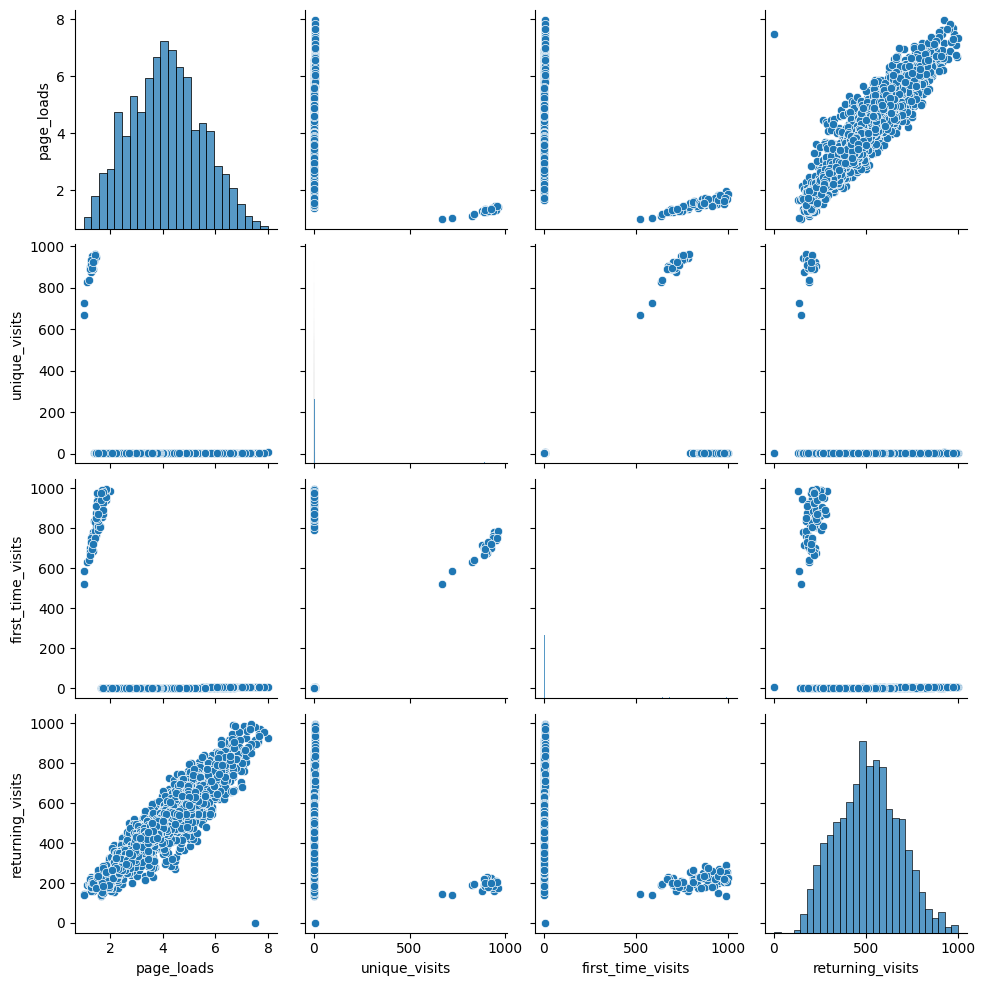

In [39]:
sns.pairplot(data)
plt.show()

In [40]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

In [41]:
data.head()

,day_of_week,page_loads,unique_visits,first_time_visits,returning_visits
date,,,,,
2014-09-14,Sunday,2.146,1.582,1.430,152.0
2014-09-15,Monday,3.621,2.528,2.297,231.0
2014-09-16,Tuesday,3.698,2.630,2.352,278.0
2014-09-17,Wednesday,3.667,2.614,2.327,287.0
2014-09-18,Thursday,3.316,2.366,2.130,236.0


Encode the categorical features.

In [42]:
# Write your code here. Add as many boxes as you need.
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
data['day_of_week'] = enc.fit_transform(data['day_of_week'])

In [43]:
data.head()

,day_of_week,page_loads,unique_visits,first_time_visits,returning_visits
date,,,,,
2014-09-14,3,2.146,1.582,1.430,152.0
2014-09-15,1,3.621,2.528,2.297,231.0
2014-09-16,5,3.698,2.630,2.352,278.0
2014-09-17,6,3.667,2.614,2.327,287.0
2014-09-18,4,3.316,2.366,2.130,236.0


# Feauture Extraction
Apply a lag of one, two, and three days to each chosen feature (except `day_of_week`), creating a set of features representing the statistics from the previous three days. To maintain dataset integrity, eliminate any resulting missing values at the beginning of the dataset.

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [44]:
# Write your code here. Add as many boxes as you need.
COLUMNS = data.columns

for column in COLUMNS:
    for i in range(1, 4):
        data[f'{column}_shift_{i}'] = data[column].shift(i)

In [45]:
data.dropna(inplace=True)
data=data.drop(['unique_visits','first_time_visits','returning_visits'],axis=1)

In [46]:
data.head()

,day_of_week,page_loads,day_of_week_shift_1,day_of_week_shift_2,day_of_week_shift_3,page_loads_shift_1,page_loads_shift_2,page_loads_shift_3,unique_visits_shift_1,unique_visits_shift_2,unique_visits_shift_3,first_time_visits_shift_1,first_time_visits_shift_2,first_time_visits_shift_3,returning_visits_shift_1,returning_visits_shift_2,returning_visits_shift_3
date,,,,,,,,,,,,,,,,,
2014-09-17,6,3.667,5.0,1.0,3.0,3.698,3.621,2.146,2.630,2.528,1.582,2.352,2.297,1.430,278.0,231.0,152.0
2014-09-18,4,3.316,6.0,5.0,1.0,3.667,3.698,3.621,2.614,2.630,2.528,2.327,2.352,2.297,287.0,278.0,231.0
2014-09-19,0,2.815,4.0,6.0,5.0,3.316,3.667,3.698,2.366,2.614,2.630,2.130,2.327,2.352,236.0,287.0,278.0
2014-09-20,2,1.658,0.0,4.0,6.0,2.815,3.316,3.667,1.863,2.366,2.614,1.622,2.130,2.327,241.0,236.0,287.0
2014-09-21,3,2.288,2.0,0.0,4.0,1.658,2.815,3.316,1.118,1.863,2.366,985.000,1.622,2.130,133.0,241.0,236.0


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [47]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import train_test_split
X,Y=data.drop(columns=['page_loads']), data['page_loads']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, shuffle=False)

## Ensemble Learning Methods

### Bagging

Create an instance of a Random Forest model and train it using the `fit` function.

In [48]:
# Write your code here. Add as many boxes as you need.
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train,Y_train)

RandomForestRegressor()

Use the trained model to make predictions for the test set.

In [49]:
# Write your code here. Add as many boxes as you need.
y_pred_rfr = rfr_model.predict(X_test)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [50]:
# Write your code here. Add as many boxes as you need.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rfr_mse = mean_squared_error(Y_test, y_pred_rfr)
rfr_mae = mean_absolute_error(Y_test, y_pred_rfr)
rfr_r2 = r2_score(Y_test, y_pred_rfr)
print(f'Random Forest\n')
print(f'MSE: {rfr_mse}')
print(f'MAE: {rfr_mae}')
print(f'R2 : {rfr_r2}')

Random Forest

MSE: 0.17464452832702046
MAE: 0.30591856812933005
R2 : 0.875656107752387


### Boosting

Create an instance of an XGBoost model and train it using the `fit` function.

In [51]:
# Write your code here. Add as many boxes as you need.
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.01, max_depth=3)
xgb_model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Use the trained model to make predictions for the test set.

In [52]:
# Write your code here. Add as many boxes as you need.
y_pred_xgb=xgb_model.predict(X_test)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [53]:
# Write your code here. Add as many boxes as you need.
xgb_mse = mean_squared_error(Y_test,y_pred_xgb)
xgb_mae = mean_absolute_error(Y_test, y_pred_xgb)
xgb_r2 = r2_score(Y_test, y_pred_xgb)
print(f'XGBoost\n')
print(f'MSE: {xgb_mse}')
print(f'MAE: {xgb_mae}')
print(f'R2 : {xgb_r2}')

XGBoost

MSE: 0.36402172414718753
MAE: 0.4722712886096698
R2 : 0.7408228103293797


# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune the number of estimators (`n_estimators`) for the XGBoost model using a cross-validation with grid search and time series split. This involves systematically experimenting with various values for `n_estimators` and evaluating the model's performance using cross-validation. Upon determining the most suitable `n_estimators` value, evaluate the model's performance on a test set for final assessment.

Hints:
- For grid search use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.
- For cross-validation use the `TimeSeriesSplit` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**

In [54]:
# Write your code here. Add as many boxes as you need.
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, shuffle=False)

## Fine-tuning the XGBoost Hyperparameter
Experiment with various values for `n_estimators` and evaluate the model's performance using cross-validation.

In [55]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
model = RandomForestRegressor(criterion='squared_error')
param_grid = {
    'n_estimators': [100,200],
}
tscv = TimeSeriesSplit(n_splits =5)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv)
grid_search.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [100, 200]})

## Final Assessment of the Model Performance
Upon determining the most suitable `n_estimators` value, evaluate the model's performance on a test set for final assessment.

In [56]:
# Write your code here. Add as many boxes as you need.
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f"Best n_estimators: {grid_search.best_params_['n_estimators']}")
print(f"Mean Squared Error: {mse}")
print(f'Mean Absolute Error: {mae}')
print(f'R2 : {r2}')

Best n_estimators: 100
Mean Squared Error: 0.22207339593732672
Mean Absolute Error: 0.3497596313364052
R2 : 0.7776814081327762
